In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:
# Step 1: Load and clean data
df = pd.read_csv("Airline_Delay_Cause.csv")
df = df.dropna(subset=["arr_delay"])  # drop rows with missing delay

# Step 2: Define features and target
X = df.drop(columns=["arr_delay"])
y = df["arr_delay"]

# Step 3: Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
# Step 5: Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

# Step 6: Predict
y_pred = reg_model.predict(X_test)

# Step 7: Evaluate with regression metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [4]:
print("Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.4f}")

Regression Metrics:
Mean Absolute Error (MAE): 108.10 minutes
Root Mean Squared Error (RMSE): 637.73 minutes
R² Score: 0.9969


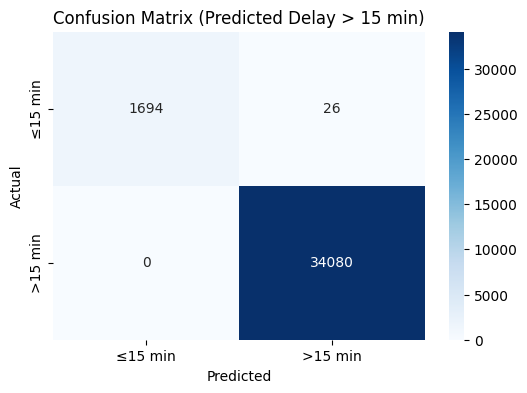

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert regression output into binary classification
threshold = 15  # minutes
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

# Generate Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["≤15 min", ">15 min"],
            yticklabels=["≤15 min", ">15 min"])
plt.title("Confusion Matrix (Predicted Delay > 15 min)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


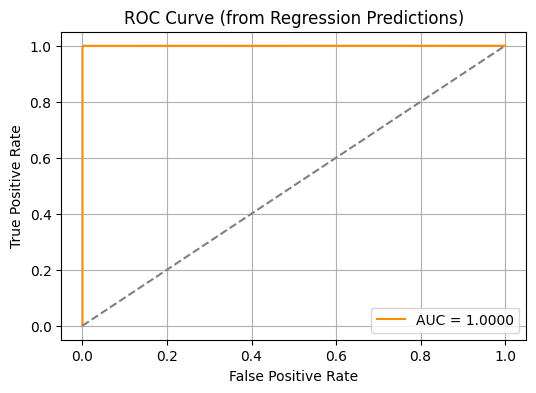

ROC AUC Score (based on 15-min threshold): 1.0000


In [9]:
# ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
auc_score = roc_auc_score(y_test_binary, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve (from Regression Predictions)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

print(f"ROC AUC Score (based on 15-min threshold): {auc_score:.4f}")

In [4]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("Airline_Delay_Cause.csv")

#Drop rows where target is NaN
df = df.dropna(subset=["arr_delay"])

# Separate features and target
X = df.drop(columns=["arr_delay"])
y = df["arr_delay"]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_train)

# Save model and column names
joblib.dump(reg_model, "regression_model.pkl")
joblib.dump(X_train.columns.tolist(), "regression_model_columns.pkl")



✅ Model and columns saved successfully.
